In [7]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe scikit-learn matplotlib

  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Not uninstalling six at c:\users\kevin\appdata\roaming\python\python312\site-packages, outside environment c:\users\kevin\asl\.venv
    Can't uninstall 'six'. No files were found to uninstall.


In [41]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             #mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             #mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             #) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [67]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

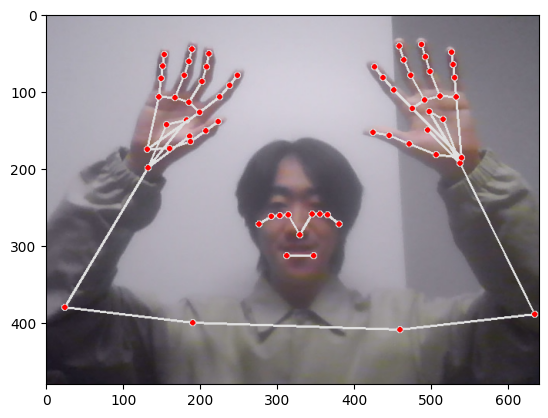

In [73]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [65]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from IPython.display import display, clear_output
import time

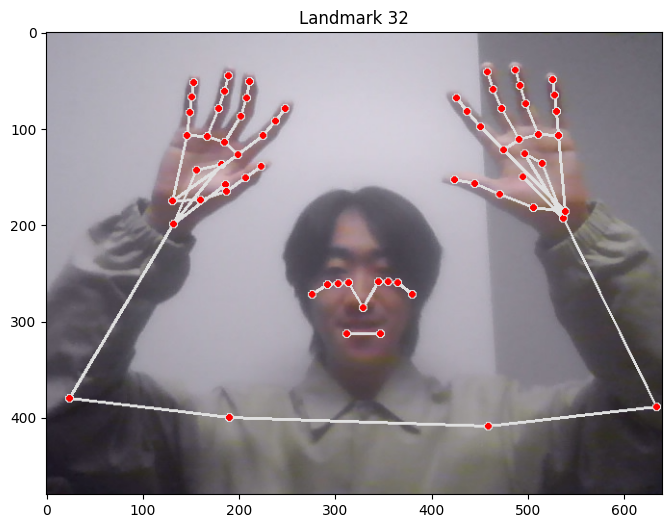

Landmark 32


In [76]:
hand_landmarks = results.pos  # or right_hand_landmarks

if hand_landmarks:
    # Convert the image from BGR to RGB for displaying with Matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_height, img_width, _ = frame.shape
    
    for i, landmark in enumerate(hand_landmarks.landmark):
        # Clear the previous figure
        clear_output(wait=True)
        
        # Copy the frame so we don't draw over the original image
        temp_img = frame_rgb.copy()
        
        # Convert normalized position to pixel position
        x = int(landmark.x * img_width)
        y = int(landmark.y * img_height)
        
        # Draw the landmark
        cv2.circle(temp_img, (x, y), 10, (255, 0, 0), -1)  # Blue circle
        
        # Show the image
        plt.figure(figsize=(10, 6))
        plt.imshow(temp_img)
        plt.title(f"Landmark {i}")
        
        # Display the plot
        display(plt.gcf())  # Get the current figure and display it
        plt.close()  # Close the figure to prevent it from being displayed again in the next iteration
        
        print(f"Landmark {i}")
        time.sleep(1)  # Wait for 1 second before moving to the next landmark

In [50]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [51]:
pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [42]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose[:69], face, lh, rh])

In [91]:

result_test = extract_keypoints(results)

In [92]:
result_test.shape

(1629,)

Pose Landmark 11: x = 0.717420220375061, y = 0.8528896570205688, z = -0.29944875836372375
Pose Landmark 12: x = 0.297575980424881, y = 0.8335437178611755, z = -0.184186190366745


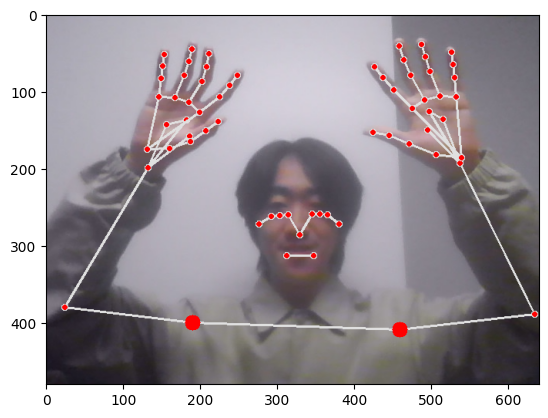

In [79]:
pose_landmarks = results.pose_landmarks

# Convert the image from BGR to RGB for displaying with Matplotlib
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

if pose_landmarks:
    # Image dimensions
    img_height, img_width, _ = frame.shape
    
    # Highlight and print landmarks 11 and 12
    for landmark_index in [11, 12]:  # Specify indices 11 and 12
        landmark = pose_landmarks.landmark[landmark_index]
        x = int(landmark.x * img_width)
        y = int(landmark.y * img_height)
        z = landmark.z  # Depth value
        
        # Print the x, y, z values
        print(f"Pose Landmark {landmark_index}: x = {landmark.x}, y = {landmark.y}, z = {landmark.z}")
        
        # Draw a circle on the image
        cv2.circle(frame_rgb, (x, y), 10, (255, 0, 0), -1)  # Blue circle with radius 10

# Display the image with highlighted landmarks
plt.imshow(frame_rgb)
plt.show()

In [94]:
result_test[33:39]

array([ 0.71742022,  0.85288966, -0.29944876,  0.29757598,  0.83354372,
       -0.18418619])

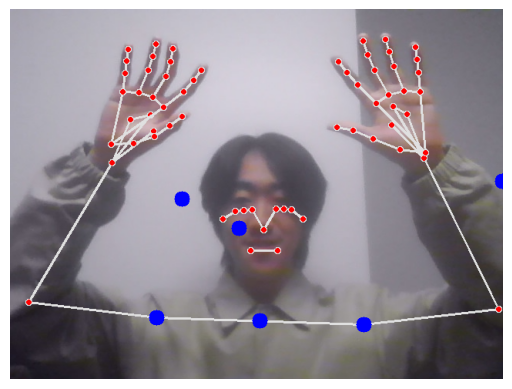

In [97]:

# Assuming 'frame_rgb' is your RGB image obtained from something like cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img_height, img_width, _ = frame_rgb.shape

# Example coordinates (normalized between 0 and 1), replace these with your actual values
coordinates = [
    (0.71742022,  0.85288966, -0.29944876),
    (0.29757598,  0.83354372, -0.18418619),
    (0.5074981000000001, 0.84321669, -0.241817475) # Second set of x, y, z coordinates
]

# Convert normalized coordinates to pixel coordinates
pixel_coordinates = [(int(x * img_width), int(y * img_height)) for x, y, z in coordinates]

# Draw blue circles at the specified coordinates
for x, y in pixel_coordinates:
    cv2.circle(frame_rgb, (x, y), radius=10, color=(0, 0, 255), thickness=-1)  # Blue circle

# Display the image with the plotted points
plt.imshow(frame_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [96]:
point1 = (0.71742022, 0.85288966, -0.29944876)
point2 = (0.29757598, 0.83354372, -0.18418619)

# Calculate the midpoint between the two points
midpoint = tuple((p1 + p2) / 2 for p1, p2 in zip(point1, point2))

midpoint

(0.5074981000000001, 0.84321669, -0.241817475)

In [ ]:
#### code for plotting the points

img_height, img_width, _ = frame_rgb.shape

# Example coordinates (normalized between 0 and 1), replace these with your actual values
coordinates = [
    (0.71742022,  0.85288966, -0.29944876),
    (0.29757598,  0.83354372, -0.18418619),
    (0.5074981000000001, 0.84321669, -0.241817475) # Second set of x, y, z coordinates
]

# Convert normalized coordinates to pixel coordinates
pixel_coordinates = [(int(x * img_width), int(y * img_height)) for x, y, z in coordinates]

# Draw blue circles at the specified coordinates
for x, y in pixel_coordinates:
    cv2.circle(frame_rgb, (x, y), radius=10, color=(0, 0, 255), thickness=-1)  # Blue circle

# Display the image with the plotted points
plt.imshow(frame_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [98]:

keypoints_array = result_test  # Example data, replace with your actual keypoints array

# Given reference point
reference_point = np.array([0.5074981000000001, 0.84321669, -0.241817475])

# Reshape the keypoints array to (-1, 3) so each row represents a point's (x, y, z) coordinates
reshaped_keypoints = keypoints_array.reshape((-1, 3))

# Subtract the reference point from each point in the reshaped array
difference_vectors = reshaped_keypoints - reference_point

# If you need to flatten the array back to its original shape
flattened_difference_vectors = difference_vectors.flatten()

In [99]:
flattened_difference_vectors

array([ 0.00722592, -0.24687782, -0.83241212, ..., -0.26805611,
       -0.73330058,  0.19501986])

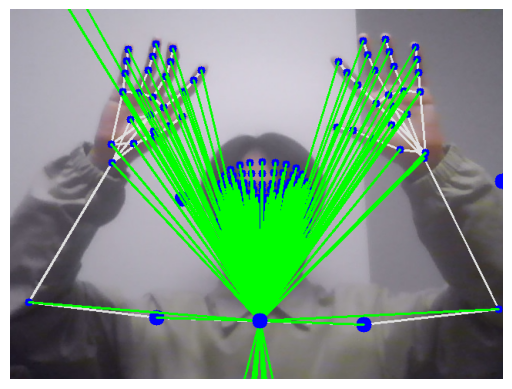

In [109]:
img_height, img_width, _ = frame_rgb.shape

# Reference point in pixel coordinates
ref_x, ref_y = int(0.5074981000000001 * img_width), int(0.84321669 * img_height)

# Assuming the difference vectors are in the same order as the original keypoints,
# and you want to plot a line for a subset or simplified representation

# Convert the first few keypoints to pixel coordinates for demonstration
# This assumes the first 6 values represent two (x, y, z) points (ignoring z for plotting)
keypoints_pixel = [(int(x * img_width), int(y * img_height)) for x, y, _ in result_test.reshape(-1, 3)[:543]]

# Draw lines from each keypoint to the reference point
for x, y in keypoints_pixel:
    cv2.line(frame_rgb, (x, y), (ref_x, ref_y), (0, 255, 0), 2)  # Green line

# Plot the reference point
cv2.circle(frame_rgb, (ref_x, ref_y), radius=10, color=(0, 0, 255), thickness=-1)  # Blue circle for the reference point

# Display the image with the plotted points and lines
plt.imshow(frame_rgb)
plt.axis('off')  # Hide the axis
plt.show()

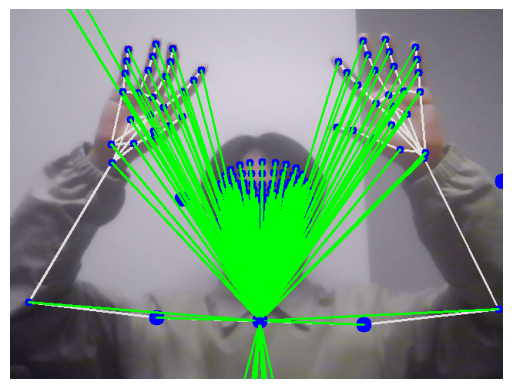

In [127]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'frame_rgb' is your RGB image
img_height, img_width, _ = frame_rgb.shape

# Convert the reference point to pixel coordinates
ref_x, ref_y = int(0.5074981000000001 * img_width), int(0.84321669 * img_height)

# Your array of difference vectors, reshaped for clarity if needed
# This is your result, assumed to be already in the correct shape
difference_vectors = compute(result_test)  # Replace with your actual array of differences

# Calculate the start points for each line by considering the difference vectors
# as pointing from the reference point to the keypoints
start_points = difference_vectors + np.array([0.5074981000000001, 0.84321669, -0.241817475])

# Convert normalized start points to pixel coordinates (ignoring z for 2D plotting)
start_points_pixel = [(int(x * img_width), int(y * img_height)) for x, y, _ in start_points]

# Draw lines from each start point to the reference point
for x, y in start_points_pixel:
    cv2.line(frame_rgb, (x, y), (ref_x, ref_y), (0, 255, 0), 1)  # Green lines

# Optionally, highlight the reference point
cv2.circle(frame_rgb, (ref_x, ref_y), radius=5, color=(0, 0, 255), thickness=-1)  # Blue circle for the reference point

# Display the image with the plotted lines and reference point
plt.imshow(frame_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:

def compute(arr):
    shoulders = arr[33:39]
    a = shoulders[0:3]
    e= shoulders[3:]
    midp = (a + e)/2
    a_t = keypoints_array.reshape(-1, 3)
    diff = a_t- midp
    return diff




In [ ]:
def compute_vectorized(arr):

    reshaped_arr = arr.reshape(-1, 1629, 3) 
    shoulders_left = reshaped_arr[:, 11, :] 
    shoulders_right = reshaped_arr[:, 12, :] 
    midpoints = (shoulders_left + shoulders_right) / 2 
    midpoints_expanded = np.expand_dims(midpoints, axis=1)
    differences = reshaped_arr - midpoints_expanded
    differences_reshaped_back = differences.reshape(90, 30, 1629, 3)
    
    return differences_reshaped_back

In [13]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello2', 'thanks2', 'iloveyou2'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [14]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [15]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
    

In [16]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello2': 0, 'thanks2': 1, 'iloveyou2': 2}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(90, 30, 1629)

In [21]:
X = np.array(sequences)


In [22]:
data_matrix = X
reshaped_matrix = data_matrix.reshape(90, -1)

New shape of the matrix: (90, 48870)


In [40]:
processed_matrix = np.concatenate((X_1[:, :, :69], X_1[:, :, 99:]), axis=2)
print(processed_matrix.shape)
reshaped_matrix = processed_matrix.reshape(90, -1)
reshaped_matrix.shape

(90, 30, 1599)


(90, 47970)